In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv",encoding = "latin-1")

In [3]:
data.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['class']=data['class'].map({'ham':0,'spam':1})

In [8]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

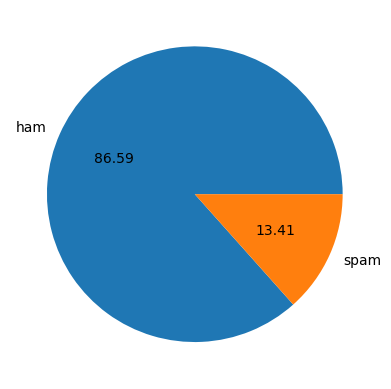

In [10]:
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NARASIMHUDU
[nltk_data]     MADIGA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
data['num_characters']=data['message'].apply(len)

In [38]:
data.head()

,class,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
data.head()

,class,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
data['num_sentences']=data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
data.head()

,class,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [50]:
data[data['class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [51]:
data[data['class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [52]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

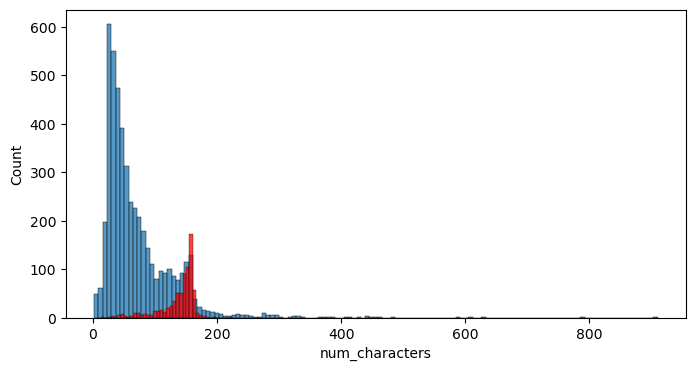

In [59]:
plt.figure(figsize=(8,4))
sns.histplot(data[data['class']== 0]['num_characters'])
sns.histplot(data[data['class']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

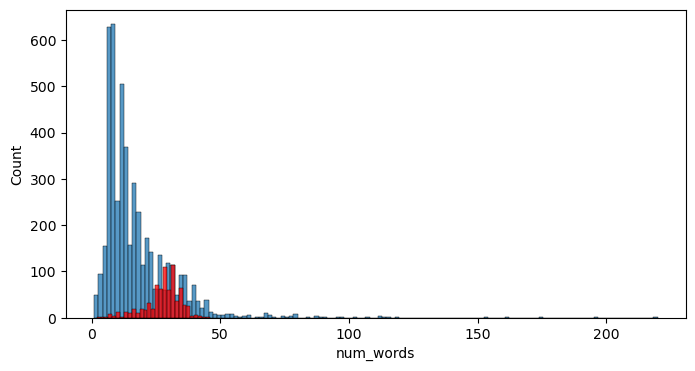

In [60]:
plt.figure(figsize=(8,4))
sns.histplot(data[data['class']== 0]['num_words'])
sns.histplot(data[data['class']== 1]['num_words'],color='red')

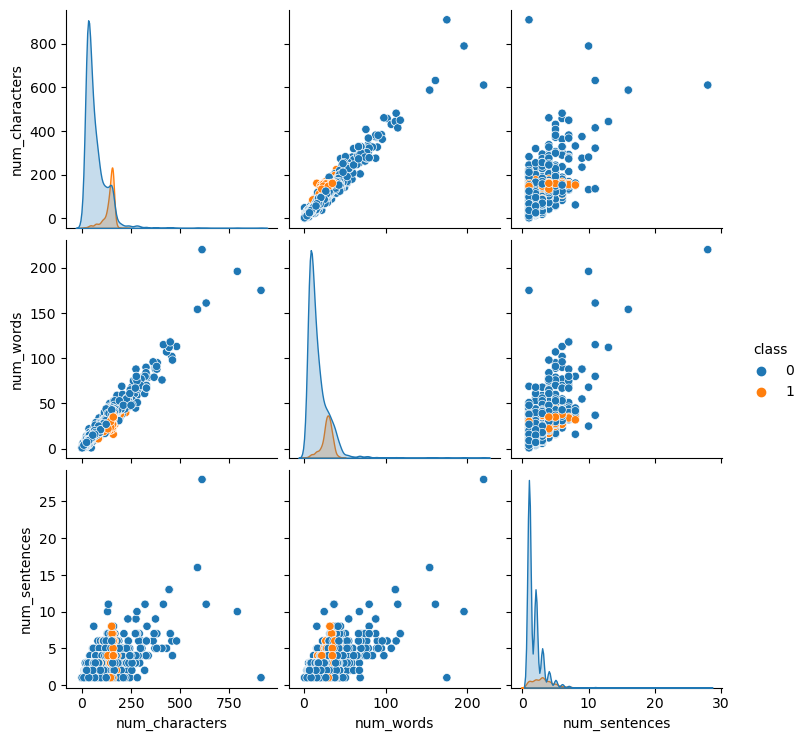

In [62]:
sns.pairplot(data,hue='class')

C:\Users\NARASIMHUDU MADIGA\AppData\Local\Temp\ipykernel_7268\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

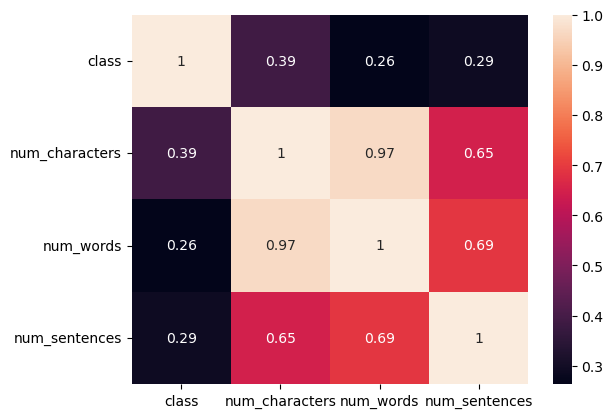

In [64]:
sns.heatmap(data.corr(),annot=True)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv = CountVectorizer()

In [67]:
x=data['message']
y=data['class']

In [68]:
x.shape

(5572,)

In [69]:
y.shape

(5572,)

In [70]:
x=cv.fit_transform(x)

In [71]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [72]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
print(x_train.shape)

(4457, 8672)


In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
model=MultinomialNB()

In [86]:
model.fit(x_train,y_train)

MultinomialNB()

In [87]:
result=model.score(x_test,y_test)

In [88]:
result=result*100

In [89]:
result

98.02690582959642

In [93]:
result_2=model.score(x_train,y_train)

In [94]:
result_2 = result_2 * 100

In [95]:
result_2

99.32690150325331

In [96]:
import pickle

In [97]:
pickle.dump(model,open("spam.pkl","wb"))

In [98]:
pickle.dump(cv,open("vectorizer.pkl","wb"))

In [99]:
clf=pickle.load(open("spam.pkl","rb"))

In [100]:
clf

MultinomialNB()

In [101]:
msg="hello there"
data=[msg]
vect=cv.transform(data).toarray()
result=model.predict(vect)
print(result)

[0]
